### Exercises

1\. Download the file ""redundant1.csv"" from the repository "https://raw.githubusercontent.com/kupav/data-sc-intro/main/data/".
Apply PCA to reveal its number of essential features. Compute the reduced dataset and create a scatter plot for it.

2\. Download the file ""redundant2.csv"" from the repository "https://raw.githubusercontent.com/kupav/data-sc-intro/main/data/".
Apply NMF and extract two its main features. Plot scatter plot for them.

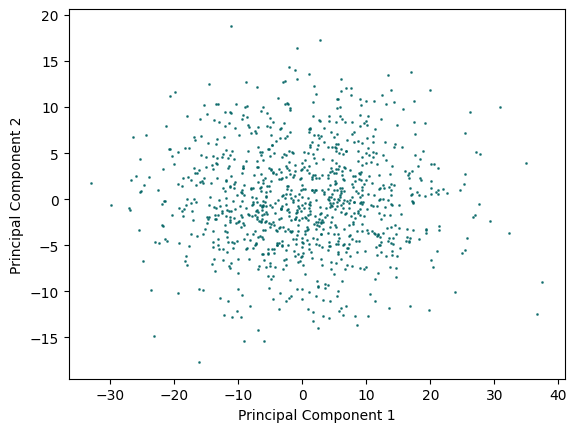

In [13]:
import csv
import numpy as np
import matplotlib.pyplot as plt
import requests
from sklearn.decomposition import PCA


def load_csv_dataset(file_name, dtype=float):
    base_url = "https://raw.githubusercontent.com/kupav/data-sc-intro/main/data/"
    web_data = requests.get(base_url + file_name)
    assert web_data.status_code == 200
    reader = csv.reader(web_data.text[:-1].splitlines(), delimiter=',')
    data = []
    for row in reader:
      float_row = [dtype(x) for x in row]
      data.append(float_row)
    return np.array(data)


data = load_csv_dataset('redundant1.csv')
pca = PCA()
pca.fit(data)

num_components = np.argmax(np.cumsum(pca.explained_variance_ratio_) > 0.95) + 1
pca = PCA(n_components=num_components)
reduced_data = pca.fit_transform(data)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(reduced_data[:, 0], reduced_data[:, 1], s=0.95, alpha=0.75, color='#006363')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
plt.show()

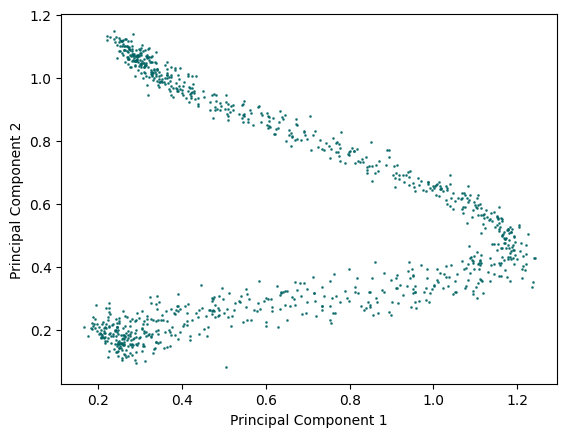

In [16]:
import csv
import numpy as np
import matplotlib.pyplot as plt
import requests
from sklearn.decomposition import NMF


def load_csv_dataset(file_name, dtype=float):
    base_url = "https://raw.githubusercontent.com/kupav/data-sc-intro/main/data/"
    web_data = requests.get(base_url + file_name)
    assert web_data.status_code == 200
    reader = csv.reader(web_data.text[:-1].splitlines(), delimiter=',')
    data = []
    for row in reader:
      float_row = [dtype(x) for x in row]
      data.append(float_row)
    return np.array(data)


data = load_csv_dataset('redundant2.csv')
nmf_model = NMF(n_components=2, init='random', random_state=0)
nmf_features = nmf_model.fit_transform(data)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(nmf_features[:, 0], nmf_features[:, 1], s=0.95, alpha=0.75, color='#006363')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
plt.show()